In [127]:
import pandas as pd


Dataset taken from Maven Analytics Data Playground

Movie Ratings

Ratings and reviews for 15,000+ movies reviewed by Rotten Tomatoes. Each record includes film details (title, description, rating, genre, directors, cast, release date, studio, runtime, etc.), as well as featured reviews, "Tomatometer" status, and audience ratings.

Recommended Analysis

What does the distribution of films look like by rating? By primary genre? (hint: use first genre listed)

What % of films received a Certified Fresh Tomatometer rating? What about Rotten?

Explore new film releases over time. How has the volume of releases by month trended over time? What year/month were the most new films released?

Compare average Tomatometer ratings by Studio. Which studios produce the highest rated films, on average? The lowest?

Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?

Explore the critics concensus rating: what language is used most often?

In [128]:
df=pd.read_csv('Rotten Tomatoes Movies.csv')

In [129]:
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0,68860.0


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [131]:
#df['in_theaters_date']=pd.to_datetime(df['in_theaters_date'])
#df['on_streaming_date']=pd.to_datetime(df['on_streaming_date'])
#changed the object type to datetime

In [132]:
df.isnull().sum()
#looking for null values

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
audience_count         252
dtype: int64

In [133]:
df.describe()
#looking at statistics of numeric types of datasets

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
count,16483.000000,16638.000000,16638.000000,16386.000000,1.638600e+04
mean,102.391494,60.466522,56.607104,60.470829,1.524797e+05
std,25.028011,28.587230,66.383800,20.462368,1.817736e+06
min,1.000000,0.000000,5.000000,0.000000,5.000000e+00
25%,90.000000,38.000000,12.000000,45.000000,8.642500e+02
50%,99.000000,66.000000,28.000000,62.000000,4.876500e+03
75%,111.000000,86.000000,76.000000,77.000000,2.875200e+04
max,2000.000000,100.000000,497.000000,100.000000,3.579764e+07


 #Looking for outliers in runtime 

In [134]:
df[df['runtime_in_minutes']>250.0]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
913,Love on the Run,"In this film, Clark Gable and Franchot Tone pl...",NaN,NR,"Classics, Comedy, Romance",W.S. Van Dyke,"John Lee Mahin, Manuel Seff, Gladys Hurlbut","Joan Crawford, Clark Gable, Franchot Tone, Reg...",1936-11-20,2008-06-17,496.0,Unknown,Fresh,80,5,60.0,273.0
944,Gettysburg,The Pulitzer Prize-winning novel The Killer An...,Gettysburg's reverent approach to history is b...,PG,"Classics, Drama",Ronald F. Maxwell,Ronald F. Maxwell,"Tom Berenger, Martin Sheen, Jeff Daniels, Rich...",1993-10-08,2000-12-05,271.0,Turner Home Entertainment,Fresh,80,20,89.0,29339.0
1806,Che: Part One (The Argentine),Nearly 40 years after Che Guevara's execution ...,"Though lengthy and at times plodding, Soderber...",R,"Art House & International, Drama",Steven Soderbergh,"Peter Buchman, Benjamin A. van der Veen, Benja...","Benicio Del Toro, Rodrigo Santoro, Catalina Sa...",2009-01-24,2009-07-14,262.0,IFC Films,Fresh,67,140,75.0,19336.0
1844,1900 (Novecento),Director Bernardo Bertolucci's epic detailing ...,NaN,R,"Art House & International, Drama",Bernardo Bertolucci,"Franco Arcalli, Giuseppe Bertolucci, Bernardo ...","Burt Lancaster, Gérard Depardieu, Robert De Ni...",1977-11-04,2006-12-05,315.0,Paramount Pictures,Rotten,53,17,85.0,6988.0
4104,Carlos,"""Carlos"" tells the story of Ilich Ramírez Sánc...","Despite its hefty running time, Carlos moves a...",NR,"Art House & International, Classics, Drama, Te...",Olivier Assayas,"Olivier Assayas, Dan Franck","Edgar Ramirez, Alexander Scheer, Nora von Wald...",2010-10-15,2011-09-27,333.0,IFC Films,Certified Fresh,93,69,85.0,6015.0
10266,Mysteries of Lisbon,Raul Ruiz's masterful adaptation of the eponym...,NaN,NR,"Art House & International, Classics, Drama, My...",Raoul Ruiz,Carlos Saboga,"Adriano Luz, Maria João Bastos, Ricardo Pereir...",2011-08-05,2012-01-17,272.0,Music Box Films,Certified Fresh,85,55,71.0,1413.0
10372,Never Sleep Again: The Elm Street Legacy,Explore the origins of everyone's favorite hid...,NaN,NR,"Documentary, Musical & Performing Arts, Televi...","Andrew Kasch, Daniel Farrands",Thommy Hutson,"Heather Langenkamp, Mark Patton, Jennifer Rubi...",2010-01-01,2014-01-21,480.0,Image Entertainment,Fresh,100,7,95.0,1067.0
12202,Scenes from a Marriage (Scener ur ett äktenskap),Marianne and Johan always seemed like the perf...,NaN,PG,Drama,Ingmar Bergman,Ingmar Bergman,"Liv Ullmann, Erland Josephson, Bibi Andersson,...",1974-09-15,2004-03-16,283.0,Criterion Collection,Fresh,88,17,95.0,8377.0
13539,Terror Tract,John Ritter stars in this three-part horror an...,NaN,R,"Comedy, Horror, Mystery & Suspense","Lance W. Dreesen, Clint Hutchinson, Clint Hutc...",Clint Hutchison,"John Ritter, Bryan Cranston, Rachel York, Carm...",2000-10-18,2001-01-30,2000.0,USA Home Entertainment,Fresh,60,5,35.0,586.0
16186,When the Levees Broke: A Requiem in Four Acts,Controversial filmmaker Spike Lee explores the...,When the Levees Broke offers a heart-rending e...,NR,"Documentary, Special Interest, Television",Spike Lee,NaN,"Harry Belafonte, Terence Blanchard, Mike Myers...",2006-08-16,2006-12-19,255.0,NaN,Fresh,97,33,96.0,5830.0


Text(0.5, 1.0, 'Outliers in runtime')

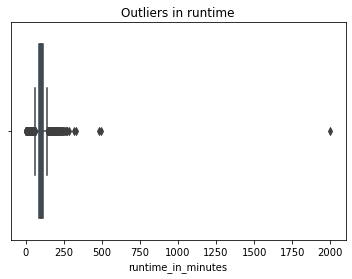

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.boxplot(x='runtime_in_minutes',data=df)
plt.title('Outliers in runtime')

In [136]:
q1=df['runtime_in_minutes'].quantile(0.25)
q3=df['runtime_in_minutes'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)

In [137]:
print(q1,q3,iqr,ul,ll)

90.0 111.0 21.0 142.5 58.5


In [138]:
df['runtime_in_minutes']=df['runtime_in_minutes'].apply(lambda x: ul if(x>ul) else ( ll if x<ll else x ))
#fixed ouliers 

Text(0.5, 1.0, 'Outliers in runtime')

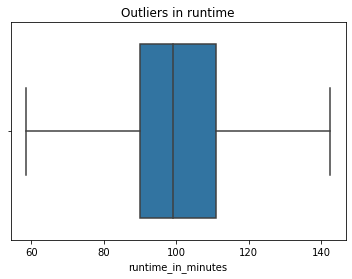

In [139]:
sns.boxplot(x='runtime_in_minutes',data=df)
plt.title('Outliers in runtime')

In [140]:
#dealing with missing values

In [141]:
df['movie_info'].fillna('Missing',inplace=True)
df['critics_consensus'].fillna('Missing',inplace=True)
df['genre'].fillna(df['genre'].value_counts().idxmax(),inplace=True)
df['directors'].fillna('Missing',inplace=True)
df['writers'].fillna('Missing',inplace=True)
df['cast'].fillna('Missing',inplace=True)
df['in_theaters_date'].fillna('Missing',inplace=True)
df['on_streaming_date'].fillna('Missing',inplace=True)
df['runtime_in_minutes'].fillna(df['runtime_in_minutes'].mean(),inplace=True)
df['studio_name'].fillna('Missing',inplace=True)
df['on_streaming_date'].fillna('Missing',inplace=True)
df['audience_rating'].fillna(df['audience_rating'].mean(),inplace=True)
df['audience_count'].fillna(df['audience_count'].mean(),inplace=True)


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16638 non-null  object 
 2   critics_consensus   16638 non-null  object 
 3   rating              16638 non-null  object 
 4   genre               16638 non-null  object 
 5   directors           16638 non-null  object 
 6   writers             16638 non-null  object 
 7   cast                16638 non-null  object 
 8   in_theaters_date    16638 non-null  object 
 9   on_streaming_date   16638 non-null  object 
 10  runtime_in_minutes  16638 non-null  float64
 11  studio_name         16638 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16638 non-null  float64
 16  audi

What does the distribution of films look like by rating?By primary genre?(hint: use first genre listed)

In [143]:
df['rating'].value_counts()

R         6136
NR        4862
PG-13     2885
PG        2062
G          652
NC17        37
PG-13)       3
R)           1
Name: rating, dtype: int64

In [144]:
df['rating']=df['rating'].str.strip(')')#fixed a noisy data in rating

In [145]:
df['rating'].value_counts()

R        6137
NR       4862
PG-13    2888
PG       2062
G         652
NC17       37
Name: rating, dtype: int64

Most movies have R,NR rating

In [146]:
df['Primary Genre']=df['genre'].apply(lambda x:x.partition(',')[0])

In [147]:
df['Primary Genre']

0        Action & Adventure
1                    Comedy
2                    Comedy
3                  Classics
4        Action & Adventure
                ...        
16633                 Drama
16634    Action & Adventure
16635    Action & Adventure
16636              Classics
16637    Action & Adventure
Name: Primary Genre, Length: 16638, dtype: object

In [148]:
df['Primary Genre'].unique()

array(['Action & Adventure', 'Comedy', 'Classics',
       'Art House & International', 'Drama', 'Documentary', 'Animation',
       'Horror', 'Kids & Family', 'Mystery & Suspense', 'Romance',
       'Cult Movies', 'Science Fiction & Fantasy',
       'Musical & Performing Arts', 'Western', 'Special Interest',
       'Television'], dtype=object)

In [149]:
dfpgr=df.groupby(['Primary Genre','rating']).size().reset_index(name='Number of Movies')

In [150]:
dfpgr=dfpgr.sort_values(by='Number of Movies',ascending=False)

In [151]:
dfpgr.head(10)

,Primary Genre,rating,Number of Movies
44,Drama,R,1719
28,Comedy,R,1443
5,Action & Adventure,R,1301
35,Documentary,NR,1050
13,Art House & International,NR,934
27,Comedy,PG-13,933
41,Drama,NR,822
4,Action & Adventure,PG-13,779
43,Drama,PG-13,657
16,Art House & International,R,656


Top ten primary genres,rating in terms of Number of Movies

What % of films received a Certified Fresh Tomatometer rating? What about Rotten?


In [152]:
df['tomatometer_status'].value_counts()/len(df)*100

Rotten             43.472773
Fresh              38.754658
Certified Fresh    17.772569
Name: tomatometer_status, dtype: float64

Explore new film releases over time. How has the volume of releases by month trended over time? What year/month were the most new films released?


In [153]:
dfym=df[~(df['in_theaters_date']=='Missing')]

In [154]:
dfym['in_theaters_date']=pd.to_datetime(dfym['in_theaters_date'])

In [155]:
dfym['Release_Year']=dfym['in_theaters_date'].dt.year
dfym['Release_Month']=dfym['in_theaters_date'].dt.month

In [156]:
dfym_movie_release_year=dfym.groupby('Release_Year')['movie_title'].count().reset_index(name='Number of Movie Releases')

Text(0, 0.5, 'Number of Movie Releases')

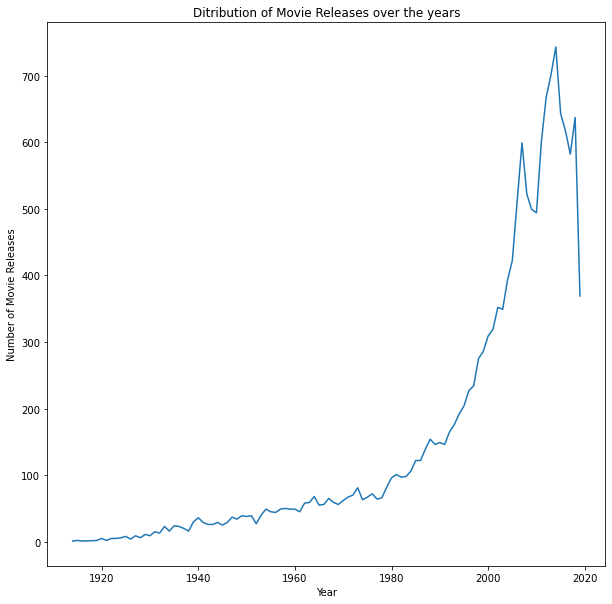

In [157]:
plt.figure(figsize=(10,10))
plt.plot(dfym_movie_release_year['Release_Year'],dfym_movie_release_year['Number of Movie Releases'])
plt.title('Ditribution of Movie Releases over the years')
plt.xlabel('Year')
plt.ylabel('Number of Movie Releases')


In [158]:
dfym_movie_release_month=dfym.groupby(['Release_Year','Release_Month'])['movie_title'].count().reset_index(name='Number of Movie Releases')

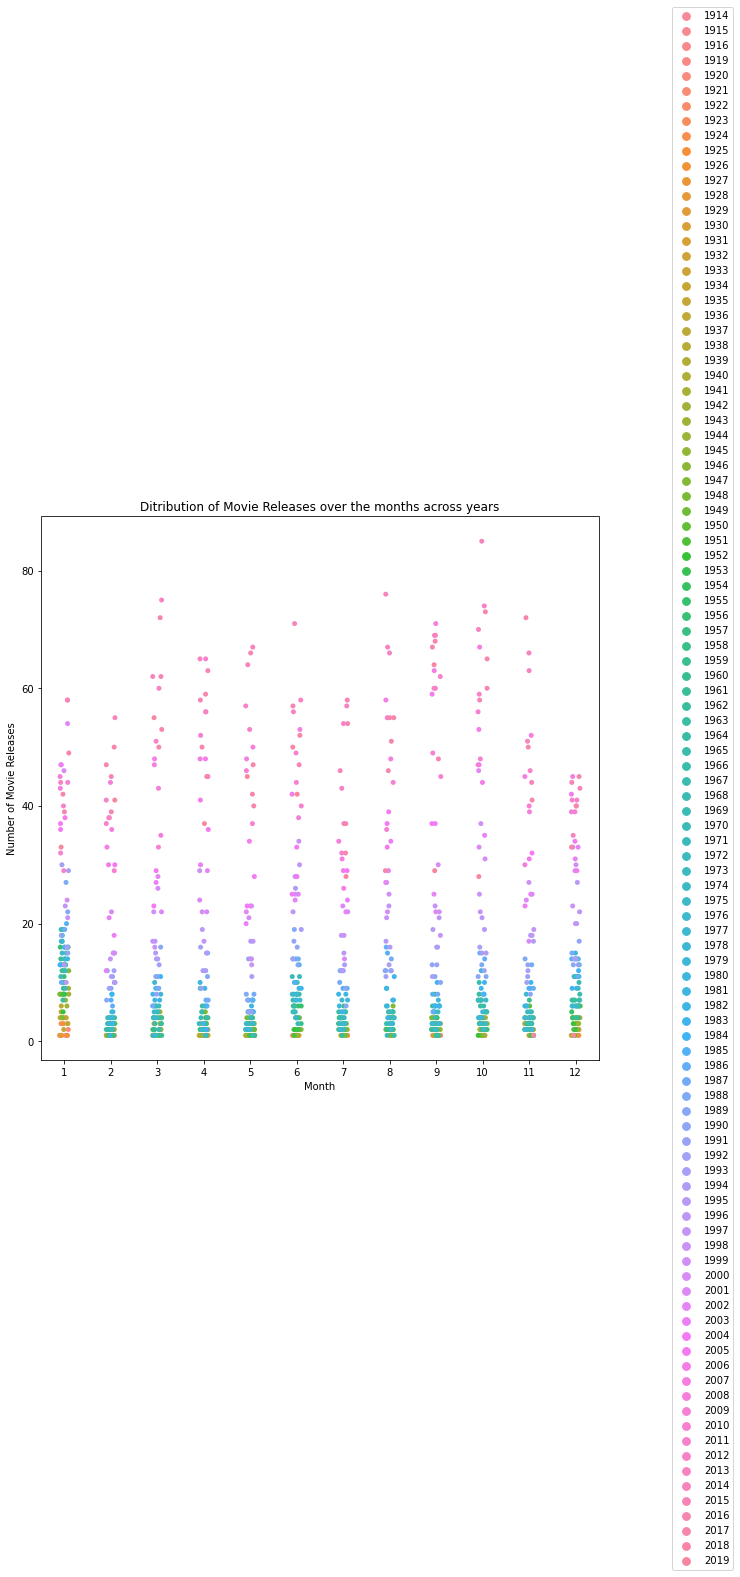

In [159]:
plt.figure(figsize=(10,10))
g=sns.stripplot(x='Release_Month',y='Number of Movie Releases',data=dfym_movie_release_month,hue='Release_Year')   
plt.title('Ditribution of Movie Releases over the months across years')
plt.xlabel('Month')
plt.ylabel('Number of Movie Releases')
g.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)


In [160]:
dfym_movie_release_month[dfym_movie_release_month['Number of Movie Releases']==dfym_movie_release_month['Number of Movie Releases'].max()]

,Release_Year,Release_Month,Number of Movie Releases
1010,2014,10,85


The Year and month with highest movie releases

Compare average Tomatometer ratings by Studio. Which studios produce the highest rated films, on average? The lowest?

In [161]:
dfr=df.groupby('studio_name')['tomatometer_rating'].mean().reset_index()

In [162]:
dfr=dfr.sort_values(by='tomatometer_rating',ascending=False)

In [163]:
dfr.head(5)

,studio_name,tomatometer_rating
1629,Menemsha,100.0
2594,Typecast Releasing,100.0
1690,Mojo Music,100.0
978,First National Pictures Inc.,100.0
2599,UMPO,100.0


Top 5 studios making highest rating films

In [164]:
dfr.tail(5)

,studio_name,tomatometer_rating
1178,Hereford Films,0.0
740,Dolores Pictures LLC,0.0
2690,Vestron Pictures Ltd.,0.0
1246,Image Entertianment,0.0
1722,MulticomTV,0.0


Top 5 studios making lowest rating films

Compare the Tomatometer ratings against audience ratings. Which films showed the largest discrepancies between audiences and critics?

In [165]:
df=df.sort_values(by=['tomatometer_rating','audience_rating'],ascending=[False,True])

In [166]:
df.head(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Primary Genre
5808,Everybody Knows... Elizabeth Murray,This documentary profiles painter and artist E...,Missing,NR,Documentary,Kristi Zea,Missing,"Elizabeth Murray, Meryl Streep, Douglas Baxter...",2017-01-11,2017-10-24,58.5,RubyRed Productions,Fresh,100,6,17.0,31.0,Documentary
8564,Knock Down the House,When tragedy struck her family in the midst of...,A galvanizing glimpse behind the scenes of a p...,PG,Documentary,Rachel Lears,"Rachel Lears, Robin Blotnick","Alexandria Ocasio-Cortez, Amy Vilela, Cori Bus...",2019-05-01,2019-05-01,86.0,Netflix,Certified Fresh,100,86,17.0,2686.0,Documentary
15832,Vengeance Valley,"The old ""Cain and Abel"" plot device is redefin...",Missing,PG,"Action & Adventure, Classics, Western",Richard Thorpe,Irving Ravetch,"Burt Lancaster, Joanne Dru, Sally Forrest, Joh...",1951-01-01,1999-09-27,83.0,MGM,Fresh,100,5,20.0,912.0,Action & Adventure
7044,Hannah Gadsby: Nanette,In her hilarious debut Netflix Original stand-...,Hannah Gadsby: Nanette brilliantly moves moder...,NR,Comedy,"Madeleine Parry, Jon Olb",Hannah Gadsby,Hannah Gadsby,2018-06-19,2018-06-19,69.0,Netflix,Certified Fresh,100,46,22.0,1477.0,Comedy
15433,Traffic Stop,Oscar-nominated documentary short chronicling ...,Missing,NR,Documentary,Kate Davis,Missing,Missing,Missing,2018-02-16,58.5,HBO Documentary Films,Fresh,100,8,23.0,49.0,Documentary


In [167]:
df.tail(5)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count,Primary Genre
1738,Home,"More than a film, HOME was conceived as a gift...",Missing,NR,"Documentary, Drama, Kids & Family",Yann Arthus-Bertrand,Missing,"Yann Arthus-Bertrand, Glenn Close, Jacques Gam...",2011-02-04,2009-06-05,120.00000,FilmBuff,Rotten,0,5,86.0,1884.0,Documentary
13665,The After Party,When an aspiring rapper goes viral for all the...,Missing,NR,"Comedy, Musical & Performing Arts",Ian Edelman,Ian Edelman,"Kyle Harvey, Harrison Holzer, Shelley Hennig, ...",2018-08-24,2018-08-24,101.64245,Netflix,Rotten,0,5,89.0,386.0,Comedy
7135,Hating Breitbart,"From ACORN to Weinergate, HATING BREITBART tel...",Missing,PG-13,"Documentary, Special Interest",Andrew Marcus,Andrew Marcus,"Andrew Breitbart, Orson Bean, Susie Breitbart,...",2012-05-17,2013-05-20,92.00000,Rocky Mountain Pictures,Rotten,0,9,92.0,803.0,Documentary
8013,Is That a Gun in Your Pocket?,"If there's one thing the men of Rockford, Texa...",Missing,R,Comedy,Matt Cooper,Matt Cooper,"Andrea Anders, Matt Passmore, Katherine McNama...",2016-09-16,2017-03-31,97.00000,The Vault,Rotten,0,11,92.0,379.0,Comedy
1990,96 Souls,"In this intriguing sci-fi drama, a scientist g...",Missing,NR,"Drama, Science Fiction & Fantasy",Stanley Jacobs,Stanley Jacobs,"Grinnell Morris, Sid Veda, Paul Statman, Micha...",2017-05-26,2017-05-30,112.00000,SJPL Films,Rotten,0,6,95.0,140.0,Drama


Explore the critics concensus rating: what language is used most often?

In [168]:
text=(' ').join(i for i in df['critics_consensus'] )

In [169]:
from wordcloud import WordCloud,STOPWORDS

In [170]:
word_cloud = WordCloud(
width=3000,
height=2000,
random_state=1,
background_color="white",
colormap="twilight_shifted",
collocations=False,
stopwords=STOPWORDS,
).generate (text)

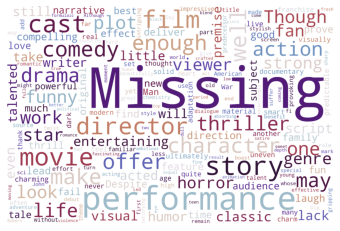

In [171]:
plt.imshow(word_cloud)
plt.axis("off")
plt.show()
